In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls "/gdrive/My Drive/resource"

bert.ipynb   testt.csv	 tweet.csv     Untitled0.ipynb
bertt.ipynb  train.json  twitter.csv   Untitled1.ipynb
test.json    trainn.csv  twitter.json  val.json


In [ ]:
import os
os.chdir("/gdrive/My Drive/resource")

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3370800209767801788, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9307786262962822542
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:

import csv
import random
import warnings
from datetime import datetime
!pip install transformers
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adagrad
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, f1_score
from sklearn.utils import class_weight
from tqdm import tqdm
from transformers import AutoModel, AutoTokenizer
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from tensorflow.keras import layers


import requests, string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
!pip install emoji
import emoji

     |████████████████████████████████| 1.8MB 15.9MB/s 
     |████████████████████████████████| 2.9MB 49.6MB/s 
     |████████████████████████████████| 890kB 58.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=9171af2ce557abdf223e64a6e73d94fccf98a7d2848881bce2a6e7377b1c6db8
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 133kB 17.5MB/s 


In [ ]:

#Verinin okunması 
df = pd.read_csv('twitter.csv')
df

,id,text,tarih,duygu
0,1349073213356187650,Bu son #Survivor #SurvivorPanaroma #survivorek...,2021-01-12 19:18:13,pozitif
1,1349072961387552769,Gece 12 ye kdr takip edip twitlerimi beğenen h...,2021-01-12 19:17:13,pozitif
2,1349072690381000704,İzleyelim \n#Survivor #SurvivorPanaroma #survi...,2021-01-12 19:16:08,negatif
3,1349072293893435392,#WatsAPPsiliyoruz TELEGRAM WEB NASIL KULLANILI...,2021-01-12 19:14:34,nötr
4,1349071802383949827,#WatsAPPsiliyoruz bir karar al be https://t.c...,2021-01-12 19:12:36,negatif
...,...,...,...,...
9295,1349083487115087872,Şimdi whatsapp düşünsün 🤓\n#WhatsApp\n#WatsAPP...,2021-01-12 19:59:02,pozitif
9296,1349082829355933696,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25,negatif
9297,1349082589143986177,Efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28,negatif
9298,1349082306326228993,Watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21,negatif


In [ ]:

#Veriden örnekleri görme
df.head()

,id,text,tarih,duygu
0,1349073213356187650,Bu son #Survivor #SurvivorPanaroma #survivorek...,2021-01-12 19:18:13,pozitif
1,1349072961387552769,Gece 12 ye kdr takip edip twitlerimi beğenen h...,2021-01-12 19:17:13,pozitif
2,1349072690381000704,İzleyelim \n#Survivor #SurvivorPanaroma #survi...,2021-01-12 19:16:08,negatif
3,1349072293893435392,#WatsAPPsiliyoruz TELEGRAM WEB NASIL KULLANILI...,2021-01-12 19:14:34,nötr
4,1349071802383949827,#WatsAPPsiliyoruz bir karar al be https://t.c...,2021-01-12 19:12:36,negatif


In [ ]:

#Veriden örnekleri görme
df.head()

,id,text,tarih,duygu
0,1349073213356187650,Bu son #Survivor #SurvivorPanaroma #survivorek...,2021-01-12 19:18:13,pozitif
1,1349072961387552769,Gece 12 ye kdr takip edip twitlerimi beğenen h...,2021-01-12 19:17:13,pozitif
2,1349072690381000704,İzleyelim \n#Survivor #SurvivorPanaroma #survi...,2021-01-12 19:16:08,negatif
3,1349072293893435392,#WatsAPPsiliyoruz TELEGRAM WEB NASIL KULLANILI...,2021-01-12 19:14:34,nötr
4,1349071802383949827,#WatsAPPsiliyoruz bir karar al be https://t.c...,2021-01-12 19:12:36,negatif


In [ ]:
df.duygu.value_counts()

negatif    4340
pozitif    3100
nötr       1860
Name: duygu, dtype: int64

In [ ]:
possible_labels = df.duygu.unique()

In [ ]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
df['label'] = df.duygu.replace(label_dict)

In [ ]:
df.head()

,id,text,tarih,duygu,label
0,1349073213356187650,Bu son #Survivor #SurvivorPanaroma #survivorek...,2021-01-12 19:18:13,pozitif,0
1,1349072961387552769,Gece 12 ye kdr takip edip twitlerimi beğenen h...,2021-01-12 19:17:13,pozitif,0
2,1349072690381000704,İzleyelim \n#Survivor #SurvivorPanaroma #survi...,2021-01-12 19:16:08,negatif,1
3,1349072293893435392,#WatsAPPsiliyoruz TELEGRAM WEB NASIL KULLANILI...,2021-01-12 19:14:34,nötr,2
4,1349071802383949827,#WatsAPPsiliyoruz bir karar al be https://t.c...,2021-01-12 19:12:36,negatif,1


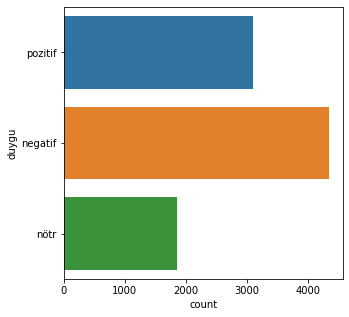

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(y = 'duygu', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


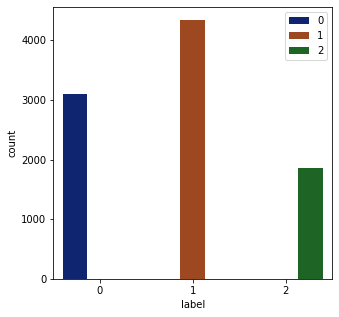

In [ ]:
plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(df["label"],hue = df["label"],palette = 'dark')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
a=sum(df["duygu"]=="negatif")/df.duygu.shape[0]*100
print(f"negatif oranı % : {a}")

negatif oranı % : 46.666666666666664


In [ ]:
b=sum(df["duygu"]=="pozitif")/df.duygu.shape[0]*100
print(f"pozitif oranı % : {b}")

pozitif oranı % : 33.33333333333333


In [ ]:
c=sum(df["duygu"]=="nötr")/df.duygu.shape[0]*100
print(f"negatif oranı % : {c}")

negatif oranı % : 20.0


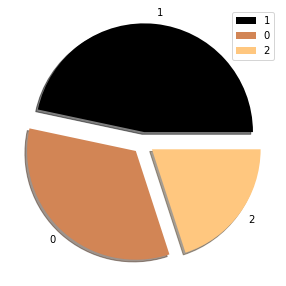

In [ ]:
labels = [1,0,2]
sizes = df["label"].value_counts()
colors = plt.cm.copper(np.linspace(0, 2, 4))
explode = [0.1,0.1, 0.1]
cmap = plt.get_cmap('Spectral')
plt.pie(sizes,labels = labels,colors = colors,shadow = True,explode = explode)
plt.legend()
plt.show()

In [ ]:
def process_text(text):
    
    text=re.sub(emoji.get_emoji_regexp(),r"",text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'[0-9]','',text)
    text=re.sub(r'https?:\/\/+','',text)
    return text.strip().lower()

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    
    return text

In [ ]:
df.text = df.text.apply(process_text)
df['text']=df['text'].apply(lambda x: remove_punct(x))
df

,id,text,tarih,duygu,label
0,1349073213356187650,bu son survivor survivorpanaroma survivorekstr...,2021-01-12 19:18:13,pozitif,0
1,1349072961387552769,gece ye kdr takip edip twitlerimi beğenen her...,2021-01-12 19:17:13,pozitif,0
2,1349072690381000704,i̇zleyelim survivor survivorpanaroma survivore...,2021-01-12 19:16:08,negatif,1
3,1349072293893435392,watsappsiliyoruz telegram web nasil kullanilir...,2021-01-12 19:14:34,nötr,2
4,1349071802383949827,watsappsiliyoruz bir karar al be tcocpzibbb,2021-01-12 19:12:36,negatif,1
...,...,...,...,...,...
9295,1349083487115087872,şimdi whatsapp düşünsün whatsappwatsappsiliyor...,2021-01-12 19:59:02,pozitif,0
9296,1349082829355933696,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:56:25,negatif,1
9297,1349082589143986177,efendi ol watsap efendi bak yüzüklerin efendis...,2021-01-12 19:55:28,negatif,1
9298,1349082306326228993,watsapp daha güvenilir diye kendi telefonundan...,2021-01-12 19:54:21,negatif,1


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.15, 
                                                  random_state=17, 
                                                  stratify=df.label.values)


In [ ]:
df['data_type'] = ['not_set']*df.shape[0]

In [ ]:
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [ ]:
df.groupby(['duygu', 'label', 'data_type']).count()

id  text  tarih
duygu   label data_type                   
negatif 1     train      3689  3689   3689
              val         651   651    651
nötr    2     train      1581  1581   1581
              val         279   279    279
pozitif 0     train      2635  2635   2635
              val         465   465    465

In [ ]:
!pip3 install transformers


In [ ]:

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
#BERT Tokenizerın pretrained olarak alınması
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
#Verilerin eğitim ve doğrulama olarak encode edilmesi
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
len(dataset_train)

7905

In [ ]:
#Doğrulama setinin uzunluğu
len(dataset_val)

1395

In [ ]:

from transformers import BertForSequenceClassification

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr=1e-6, 
                  eps=2e-8)

In [ ]:
epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

In [ ]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
#Her bir sınıf için doğruluk hesabı fonksiyonu
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/10 [05:37<?, ?it/s]


Epoch 1
Training loss: 1.0715775213414622


Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Validation loss: 1.0461063222451643
F1 Score (Weighted): 0.2980587478168136



 10%|█         | 1/10 [11:48<53:53, 359.30s/it]


Epoch 2
Training loss: 1.046721117150399


Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Validation loss: 1.044247735630382
F1 Score (Weighted): 0.29696969696969694



 20%|██        | 2/10 [17:59<48:22, 362.83s/it]


Epoch 3
Training loss: 1.0469499415447634


Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Validation loss: 1.0463437167080967
F1 Score (Weighted): 0.3028012580953758



 30%|███       | 3/10 [24:11<42:37, 365.39s/it]


Epoch 4
Training loss: 1.0429846084406298


Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Validation loss: 1.0439279052344235
F1 Score (Weighted): 0.3028012580953758



 40%|████      | 4/10 [30:22<36:42, 367.16s/it]


Epoch 5
Training loss: 1.0411794692758591


Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Validation loss: 1.0449625741351733
F1 Score (Weighted): 0.31724900629768954



 50%|█████     | 5/10 [36:34<30:42, 368.48s/it]


Epoch 6
Training loss: 1.0453331246972084


Epoch 7:   0%|          | 0/248 [00:00<?, ?it/s]

Validation loss: 1.0438530702482571
F1 Score (Weighted): 0.31112008397518626



 60%|██████    | 6/10 [42:45<24:37, 369.33s/it]


Epoch 7
Training loss: 1.0429985157905086


Epoch 8:   0%|          | 0/248 [00:00<?, ?it/s]

Validation loss: 1.0443634756586768
F1 Score (Weighted): 0.30962962962962964



 70%|███████   | 7/10 [48:57<18:30, 370.01s/it]


Epoch 8
Training loss: 1.038715485122896


Epoch 9:   0%|          | 0/248 [00:00<?, ?it/s]

Validation loss: 1.0446042093363674
F1 Score (Weighted): 0.325466476913346



 80%|████████  | 8/10 [55:09<12:20, 370.48s/it]


Epoch 9
Training loss: 1.0424164062546146


Epoch 10:   0%|          | 0/248 [00:00<?, ?it/s]

Validation loss: 1.0455205291509628
F1 Score (Weighted): 0.3347740378415225



 90%|█████████ | 9/10 [1:01:21<06:10, 370.95s/it]


Epoch 10
Training loss: 1.0400408934200964


100%|██████████| 10/10 [1:01:43<00:00, 370.31s/it]

Validation loss: 1.045463209802454
F1 Score (Weighted): 0.3319434153582275


In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
model.load_state_dict(torch.load('/gdrive/My Drive/resource/finetuned_BERT_epoch_10.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:

_, predictions, true_vals = evaluate(dataloader_validation)

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: pozitif
Accuracy: 31/465

Class: negatif
Accuracy: 619/651

Class: nötr
Accuracy: 0/279

